In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy import stats 
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df = data.copy()

In [4]:
df.shape

(2443651, 9)

In [5]:
df.columns.nunique

<bound method IndexOpsMixin.nunique of Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')>

In [6]:
df.sample(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
826157,901225,B0BVVQQFT4,"aghoer Wine Rack, 2 Pieces European Style Wine...",4.5,2,9.59,False,0,Dining Room Furniture
748062,806900,B08BJJ3SS7,HULALA Music Teacher Gifts 2 PCS Guitar Pick P...,4.8,21,8.99,False,0,Guitars & Gear
35121,38296,B00NOPA51C,Facom FCMBSSMB Maintenance Tool Bag,4.6,1125,39.87,False,0,Storage & Home Organisation
1279966,1416207,B08BHYLJJY,"BYCDD Inflatable Stand Up Paddle Board, Portab...",0.0,0,531.59,False,0,Sports & Outdoors
1760859,1982698,B0BHN579YV,"Waist Bag Holographic Fanny Pack, Geometric La...",4.4,99,4.88,False,400,Luggage and travel gear
930123,1014562,B0C72MWP6C,Love You Galaxy Heart Personalized Sneakers Li...,0.0,0,69.98,False,0,Sports & Outdoors
1583715,1784031,B07XVQD27X,"Mandala T Shirt, Womens Clothing, Womens Tshir...",0.0,0,23.00,False,0,"Handmade Clothing, Shoes & Accessories"
1270984,1406616,B0B89CBC6S,for Qinghengyong Pack of 2 Kayak Canopy Mount ...,0.0,0,10.79,False,0,Sports & Outdoors
1781088,2004862,B0C2J2NVPT,"Muscle Toner Belt,Muscle Toner Abdominal Belt ...",0.0,0,8.90,False,0,Sports & Outdoors
98655,106882,B001383Z82,Cordial Intro CCM 1.5 FM 1.5 m XLR (3-Pin) XLR...,4.6,66,14.88,False,0,Microphones


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.


1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


In [7]:
cross_tab = pd.crosstab(df['category'], df['isBestSeller'], margins=True)

In [8]:
cross_tab

isBestSeller,False,True,All
category,,,
3D Printers,247,1,248
3D Printing & Scanning,4065,2,4067
Abrasive & Finishing Products,245,5,250
Action Cameras,1696,1,1697
Adapters,251,3,254
...,...,...,...
Window Treatments,234,5,239
Women,17559,213,17772
Women's Sports & Outdoor Shoes,1939,20,1959


In [9]:
cross_tab.dtypes

isBestSeller
False    int64
True     int64
All      int64
dtype: object

In [10]:
cross_tab_prop = cross_tab.copy()
cross_tab_prop['Proportion'] = cross_tab[1] / cross_tab['All']
cross_tab_prop

isBestSeller,False,True,All,Proportion
category,,,,
3D Printers,247,1,248,0.004032
3D Printing & Scanning,4065,2,4067,0.000492
Abrasive & Finishing Products,245,5,250,0.020000
Action Cameras,1696,1,1697,0.000589
Adapters,251,3,254,0.011811
...,...,...,...,...
Window Treatments,234,5,239,0.020921
Women,17559,213,17772,0.011985
Women's Sports & Outdoor Shoes,1939,20,1959,0.010209


In [11]:
cross_tab_prop_sorted = cross_tab_prop.sort_values(by='Proportion', ascending= False)
cross_tab_prop_sorted

isBestSeller,False,True,All,Proportion
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339
...,...,...,...,...
Snowboard Boots,1449,0,1449,0.000000
Internal TV Tuner & Video Capture Cards,253,0,253,0.000000
Boxes & Organisers,911,0,911,0.000000


In [12]:
bestsellercategories = [cross_tab_prop_sorted.index[0],cross_tab_prop_sorted.index[1],cross_tab_prop_sorted.index[2],cross_tab_prop_sorted.index[3],cross_tab_prop_sorted.index[4]]

print(f'Easiest categories to find Best sellers: {bestsellercategories}')


Easiest categories to find Best sellers: ['Grocery', 'Smart Home Security & Lighting', 'Health & Personal Care', 'Mobile Phone Accessories', 'Power & Hand Tools']



2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.


In [13]:
cross_tab =cross_tab.drop("All", axis=0)

In [14]:
_, p_value, _, _ = chi2_contingency(cross_tab)
p_value
num_sci = p_value
print(f'{num_sci:.20f}')

0.00000000000000000000


The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given Null value ( p )-value, we reject the null hypothesis.

In [15]:
association(cross_tab)

0.061141471988028204

The value 0.061141471988028204 likely represents the strength of association between the categories of books and their status as bestsellers, with a Cramer's V statistic of approximately 0.061. This suggests a relatively weak association between these variables in the context of the analysis.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [16]:
df2 = cross_tab_prop_sorted.drop(columns=["All"])
df3 = df2.nlargest(20, columns=True).drop(index=["All"]) #Select the top 20 categories
df3

isBestSeller,False,True,Proportion
category,,,
Grocery,9008,556,0.058135
Health & Personal Care,9017,552,0.057686
Baby,14709,341,0.022658
Sports & Outdoors,835935,330,0.000395
Power & Hand Tools,8353,306,0.035339
Beauty,19010,302,0.015638
Pet Supplies,9152,285,0.030200
Arts & Crafts,9319,230,0.024086
Women,17559,213,0.011985


In [17]:
df4 = df3.drop(index=["Sports & Outdoors"]) #Both plots, one with this one with hugh quantity respect of the total.
df4

isBestSeller,False,True,Proportion
category,,,
Grocery,9008,556,0.058135
Health & Personal Care,9017,552,0.057686
Baby,14709,341,0.022658
Power & Hand Tools,8353,306,0.035339
Beauty,19010,302,0.015638
Pet Supplies,9152,285,0.030200
Arts & Crafts,9319,230,0.024086
Women,17559,213,0.011985
Men,17248,169,0.009703


<Figure size 2000x1200 with 0 Axes>

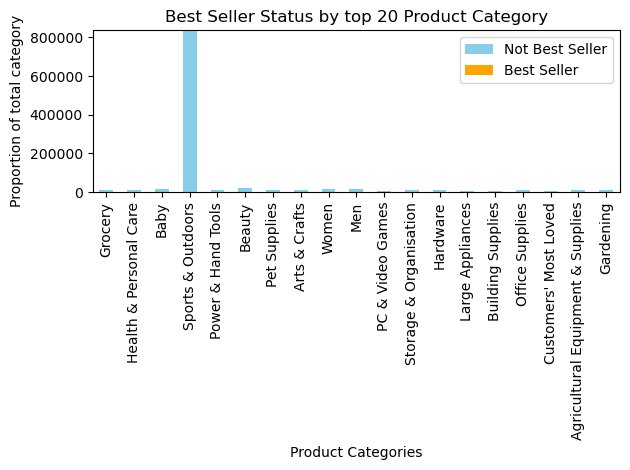

In [18]:
#First Plot: Best Seller Status by 20 Product Category

plt.figure(figsize=(20, 12))
df3.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Best Seller Status by top 20 Product Category')
plt.xlabel('Product Categories')
plt.ylabel('Proportion of total category')
plt.xticks(rotation=90)
plt.legend(labels=['Not Best Seller', 'Best Seller'])
plt.tight_layout()
plt.show()

<Figure size 3000x1500 with 0 Axes>

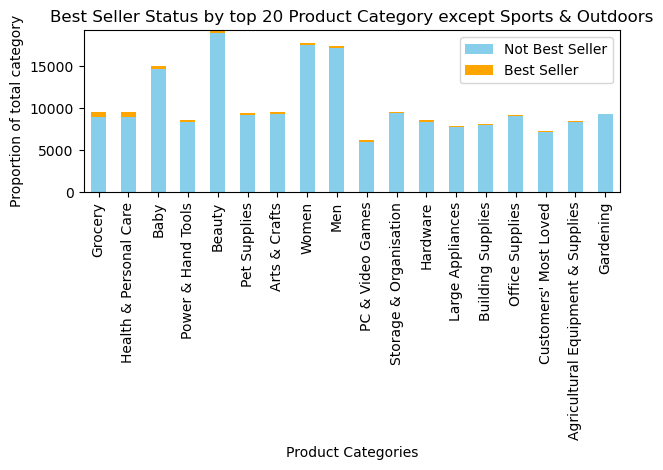

In [19]:
#Second Plot: Best Seller Status by 20 Product Category except Sport & Outdoors Category

plt.figure(figsize=(30, 15))
df4.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Best Seller Status by top 20 Product Category except Sports & Outdoors')
plt.xlabel('Product Categories')
plt.ylabel('Proportion of total category')
plt.xticks(rotation=90)
plt.legend(labels=['Not Best Seller', 'Best Seller'])
plt.tight_layout()
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.



0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*



In [20]:
df["price"].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [21]:
Q1 = np.percentile(df["price"],25)
Q3 = np.percentile(df["price"],75)
IQR = Q3-Q1

In [22]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [23]:
df_outliers= df[(df["price"]< lower_bound) | (df["price"]> upper_bound)]

In [24]:
df2 = df[(df["price"]>= lower_bound) & (df["price"]<=upper_bound)]

In [25]:
df2

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.



In [26]:
top_categories = df2['category'].value_counts().head(20).index
df2filter = df2[df2['category'].isin(top_categories)]

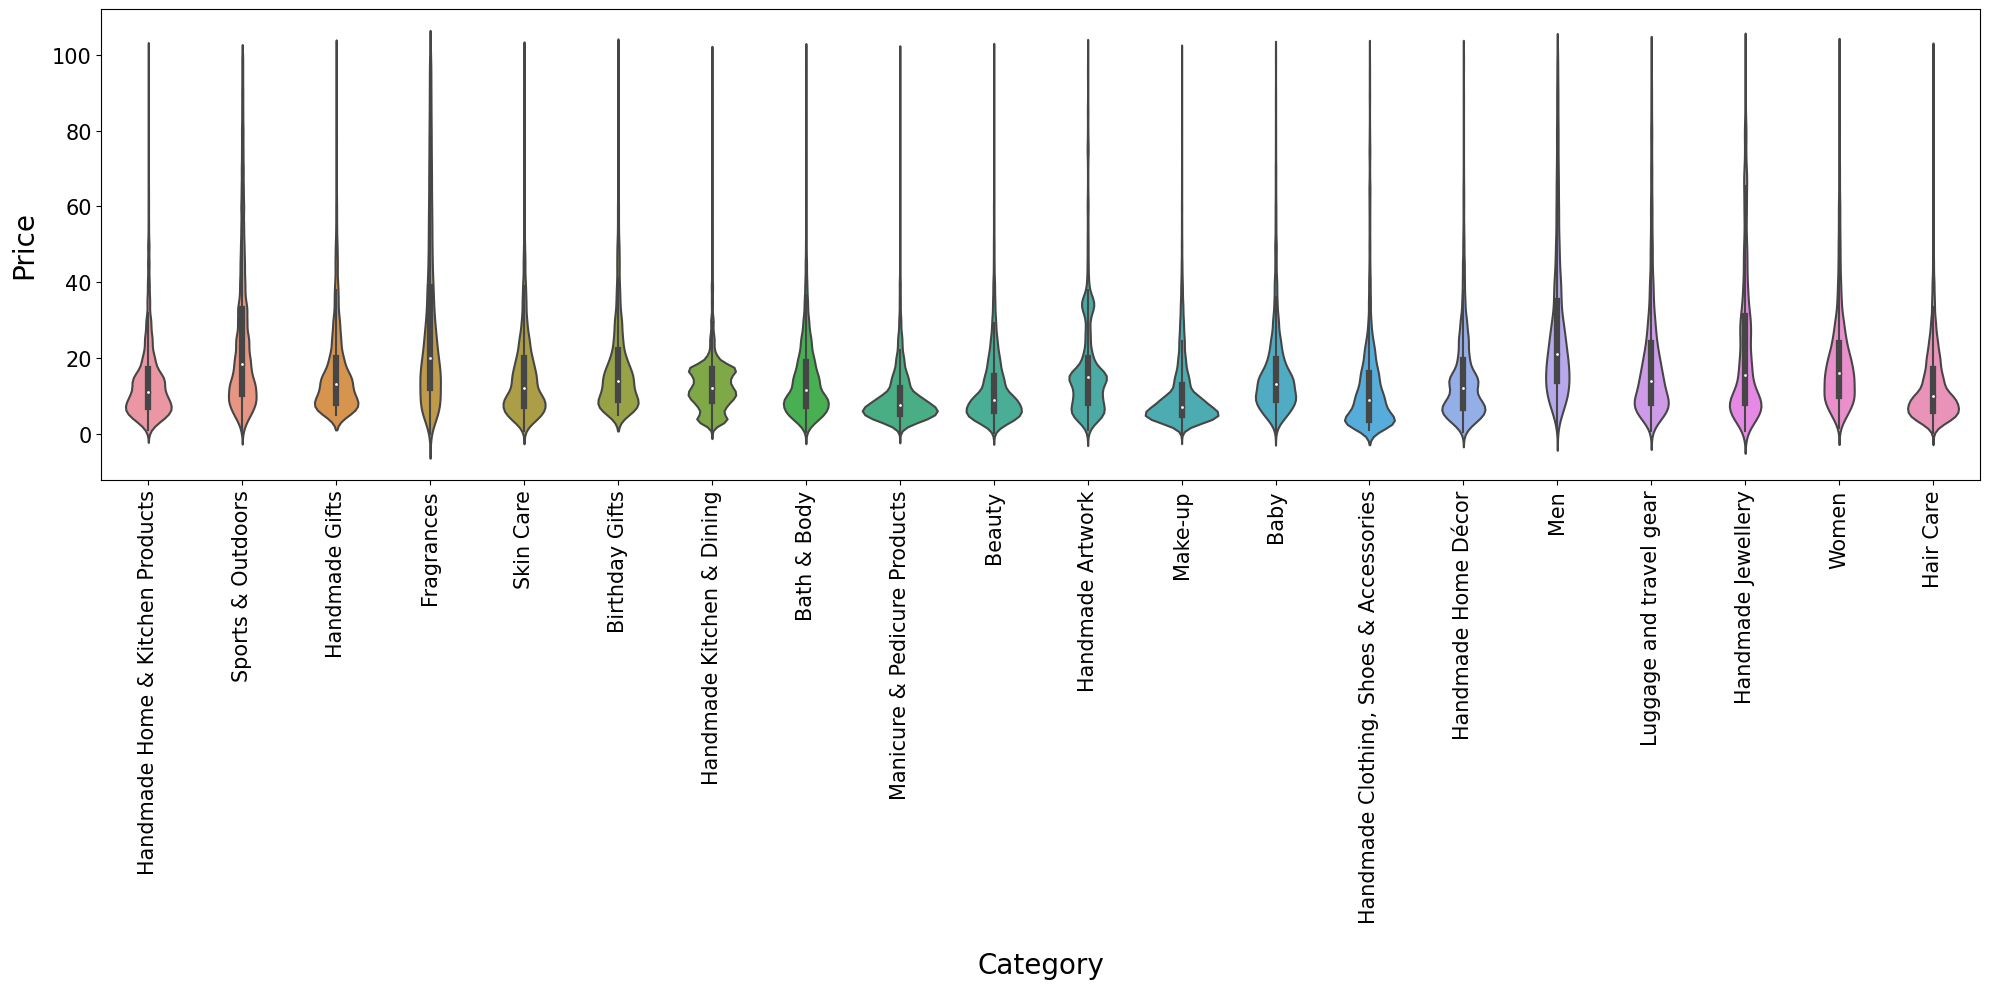

In [27]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=df2filter, x="category", y="price")
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.xlabel("Category", labelpad=20, loc='center', size=20)
plt.ylabel("Price", labelpad=10, loc='center', size=20)
plt.tight_layout()
plt.show()

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.



In [28]:
avg_prices =  df2.groupby("category")["price"].mean().sort_values(ascending=False)
df_avg_prices=pd.DataFrame(avg_prices)
df_avg_prices

,price
category,
Motherboards,68.772432
Boxing Shoes,67.417803
Desktop PCs,66.915562
Tablets,66.552971
Graphics Cards,65.103509
...,...
Bedding Accessories,8.835220
Adapters,8.750197
Signs & Plaques,8.210513


In [29]:
df_categories_count = df2['category'].value_counts().head(10).sort_values(ascending=False).head(10).reset_index()
df_categories_count

,category,count
0,Sports & Outdoors,694092
1,Beauty,19233
2,Bath & Body,19050
3,Manicure & Pedicure Products,18904
4,"Handmade Clothing, Shoes & Accessories",18811
5,Make-up,18718
6,Skin Care,18686
7,Hair Care,18625
8,Birthday Gifts,18398
9,Handmade Gifts,17948


In [30]:
df_category_mean = pd.merge(df_categories_count,df_avg_prices, on="category", how="inner")
df_category_mean

,category,count,price
0,Sports & Outdoors,694092,25.172065
1,Beauty,19233,12.523480
2,Bath & Body,19050,14.678683
3,Manicure & Pedicure Products,18904,10.231825
4,"Handmade Clothing, Shoes & Accessories",18811,12.958639
5,Make-up,18718,10.612918
6,Skin Care,18686,15.654722
7,Hair Care,18625,13.461408
8,Birthday Gifts,18398,18.600195
9,Handmade Gifts,17948,17.395112


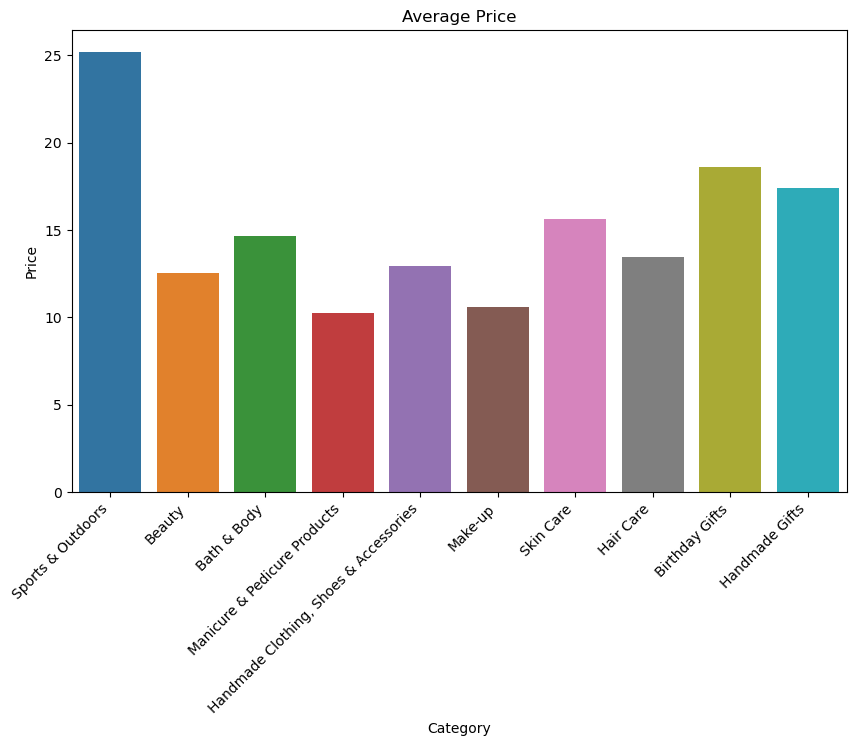

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_category_mean, x='category', y='price')
plt.xticks(rotation=45, ha='right')  
plt.title('Average Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

In [32]:
highest_avg_price_category = df_category_mean["category"][0]
print(f"The product category with the highest average price is {highest_avg_price_category}")


The product category with the highest average price is Sports & Outdoors


3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [33]:
dfrating = df[df['stars'].notna()] #Filter without NaN => 0 stars it means 
top_10_categories = dfrating['category'].value_counts().nlargest(10).index
df_top_10 = dfrating[dfrating['category'].isin(top_10_categories)]

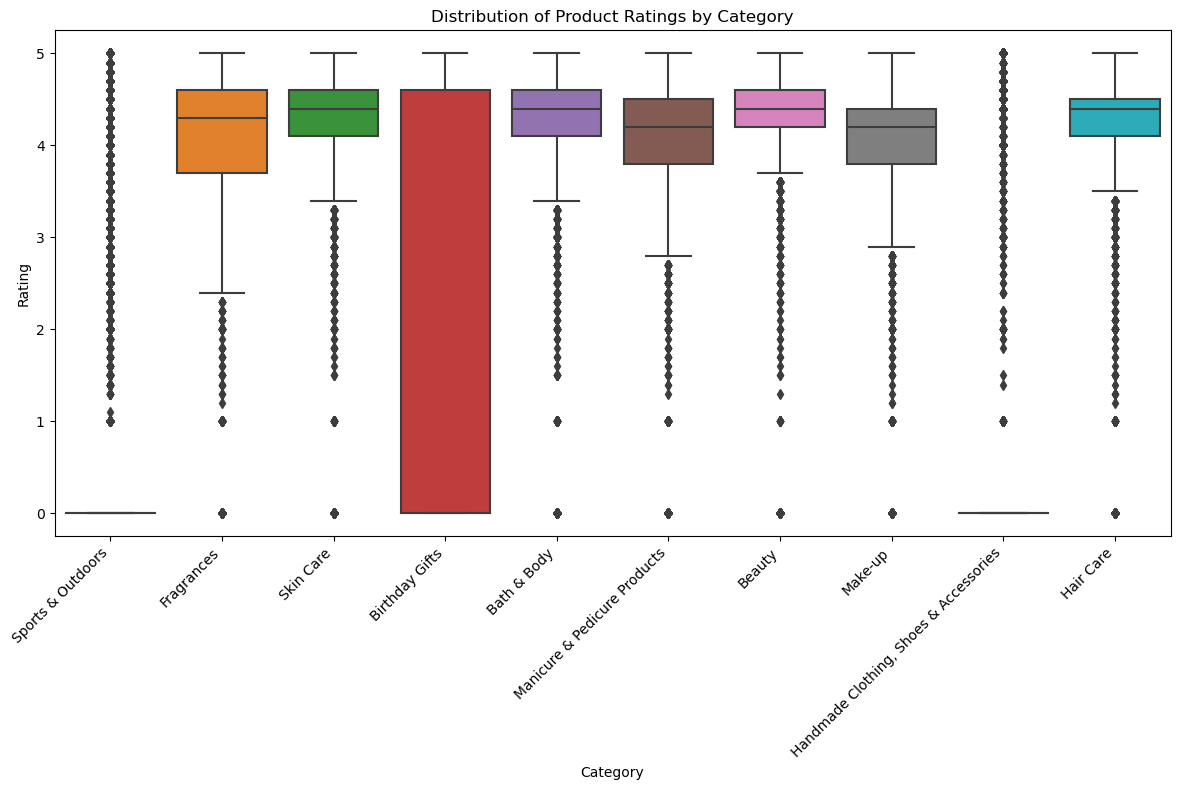

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='category', y='stars')
plt.title('Distribution of Product Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [35]:
median_ratings = df.groupby('category')['stars'].median()
highest_median_category = median_ratings.idxmax()
print(f"The category '{highest_median_category}' tends to receive the highest median rating from customers.")

The category 'Computer Memory' tends to receive the highest median rating from customers.


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.



1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

In [36]:
correlation_price_stars = dfrating['stars'].corr(dfrating['price'])

print(f"The correlation coefficient between product price and rating is: {correlation_price_stars:.2f}")

if correlation_price_stars > 0:
    print("There is a positive correlation between product price and rating.")
elif correlation_price_stars < 0:
    print("There is a negative correlation between product price and rating.")
else:
    print("There is no correlation between product price and rating.")


The correlation coefficient between product price and rating is: -0.12
There is a negative correlation between product price and rating.


It means, that when price increase ratings decrease, and ice versa, there is a inverse relationship between variables

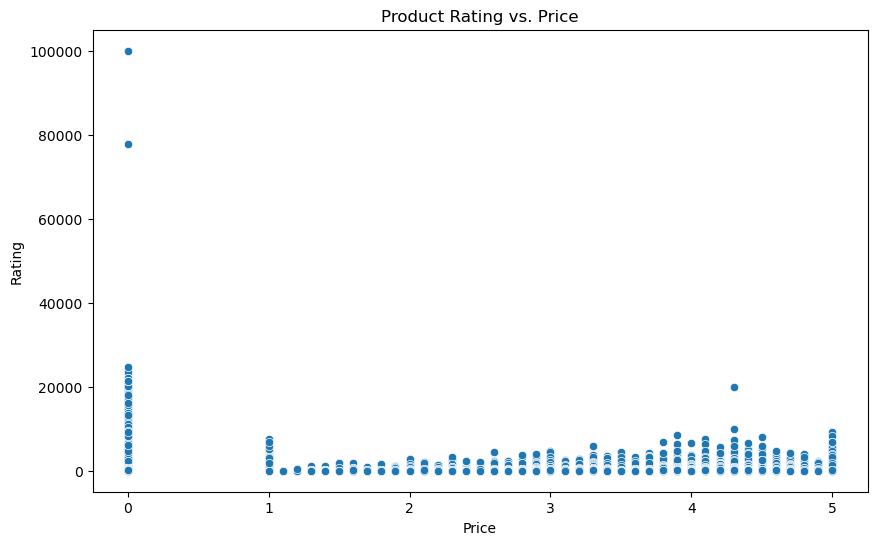

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfrating, x='stars', y='price')
plt.title('Product Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

The products that tend to receive ratings are low priced, and these ratings are usually grouped between 3.5 and 4.5.

Generally, products are not rated at all.

In [38]:
dfrating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [39]:
correlation_price_stars_matrix = dfrating[["price", "stars", "reviews","boughtInLastMonth"]].corr()


In [40]:
mask = np.triu(np.ones_like(correlation_price_stars_matrix, dtype=bool)) 

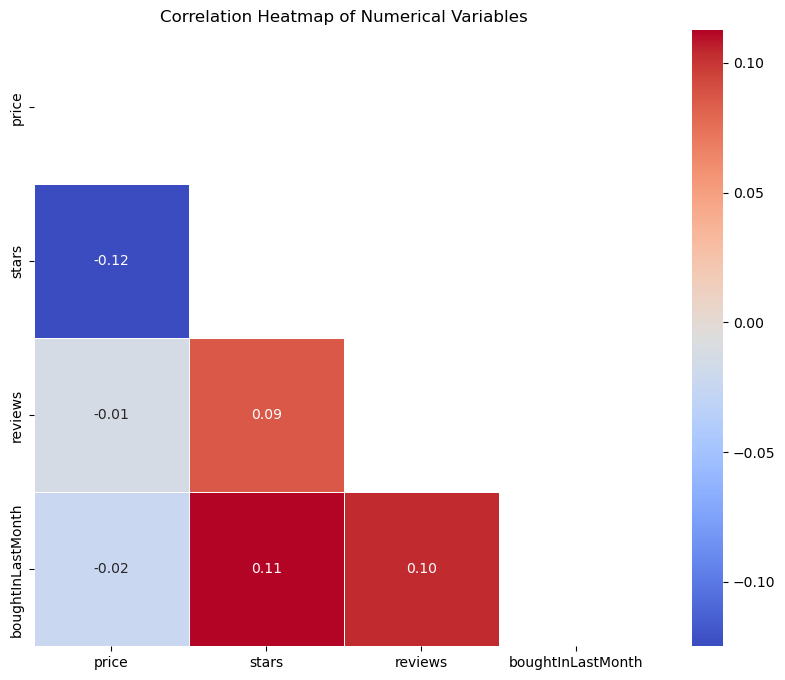

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_price_stars_matrix , annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

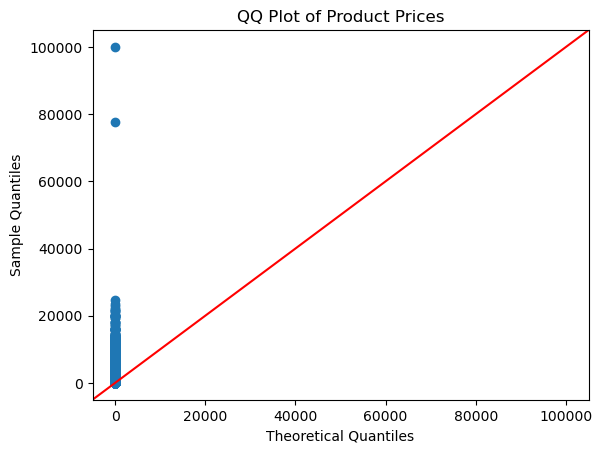

In [42]:
sm.qqplot(dfrating['price'], line ='45')
plt.title('QQ Plot of Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Product prices doesn´t follow a normal distribution.